# Exploring the Data


In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [204]:
### Reading train and test data ###
test_df= pd.read_csv('unfinished.csv', sep=',', header=0)
train_df= pd.read_csv('finished.csv', sep=',', header=0)

# data column types
train_df.info()

# what the data looks like
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173823 entries, 0 to 173822
Data columns (total 15 columns):
backers_count            173823 non-null int64
category                 173823 non-null object
country                  173823 non-null object
creator                  173823 non-null int64
currency                 173823 non-null object
disable_communication    173823 non-null bool
goal                     173823 non-null float64
is_starrable             173823 non-null bool
staff_pick               173823 non-null bool
state                    173823 non-null int64
urls                     173823 non-null object
usd_pledged              173823 non-null float64
location                 173823 non-null object
blurb_length             173823 non-null int64
duration                 173823 non-null int64
dtypes: bool(3), float64(2), int64(5), object(5)
memory usage: 16.4+ MB


,backers_count,category,country,creator,currency,disable_communication,goal,is_starrable,staff_pick,state,urls,usd_pledged,location,blurb_length,duration
0,80,art/mixed media,US,483835381,USD,False,2800.0,False,False,1,{'project': 'https://www.kickstarter.com/proje...,3596.0,"Paonia, CO",21,21
1,47,art,US,1536850207,USD,False,3900.0,False,False,1,{'project': 'https://www.kickstarter.com/proje...,4117.0,"Bakersfield, CA",26,23
2,80,art/painting,US,2039713907,USD,False,750.0,False,False,1,{'project': 'https://www.kickstarter.com/proje...,3125.0,"Lowell, MA",12,19
3,82,art/public art,US,17146650,USD,False,4500.0,False,False,1,{'project': 'https://www.kickstarter.com/proje...,4586.0,"Washington, DC",20,40
4,31,art/painting,US,1442314751,USD,False,1000.0,False,False,1,{'project': 'https://www.kickstarter.com/proje...,1036.0,"Portland, OR",10,5


In [205]:
### merging train and test data for exploration ###
# you can tell apart test and train data from the status column
df = pd.concat([train_df, test_df], ignore_index=True)

In [206]:
### describing the numerical values of the data ###
df.describe()
### describing non-numerical values of the data ###
df.describe(exclude=[np.number])

,backers_count,creator,goal,usd_pledged,blurb_length,duration
count,177768.000000,1.777680e+05,1.777680e+05,1.777680e+05,177768.000000,177768.000000
mean,129.263743,1.073674e+09,4.556443e+04,1.065866e+04,19.360430,33.611977
std,925.448230,6.198828e+08,1.208635e+06,8.128235e+04,4.845785,12.721739
min,0.000000,3.000000e+00,1.000000e-02,0.000000e+00,0.000000,1.000000
25%,3.000000,5.383356e+08,1.600000e+03,6.852201e+01,17.000000,30.000000
50%,22.000000,1.073209e+09,5.000000e+03,1.226000e+03,20.000000,30.000000
75%,77.000000,1.610515e+09,1.334045e+04,5.550000e+03,23.000000,36.000000
max,105857.000000,2.147465e+09,1.523501e+08,1.026685e+07,35.000000,92.000000


,category,country,currency,disable_communication,is_starrable,staff_pick,state,urls,location
count,177768,177768,177768,177768,177768,177768,177768,177768,177768
unique,168,22,14,2,2,2,3,177768,14399
top,music/pop,US,USD,False,False,False,1,{'project': 'https://www.kickstarter.com/proje...,"Los Angeles, CA"
freq,2400,139933,139933,177167,174065,155323,91355,1,9024


### backers_count

- The number of people who have backed the project
- Most projects have less than 100 backers
- Amount of projects with more than 10 000 backers is 146 (insignifigant amount)

count    177768.000000
mean        129.263743
std         925.448230
min           0.000000
25%           3.000000
50%          22.000000
75%          77.000000
max      105857.000000
Name: backers_count, dtype: float64

146

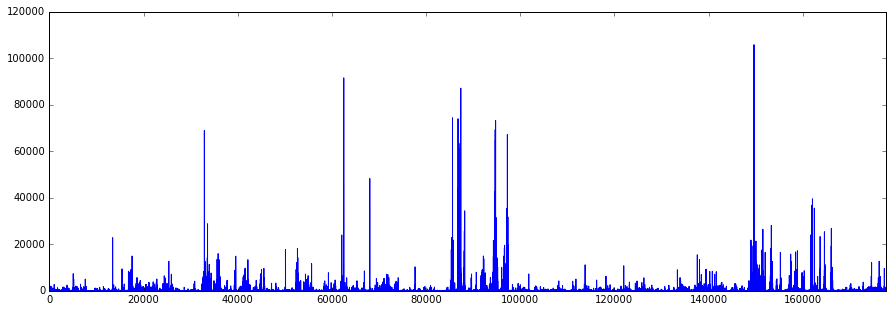

In [207]:
df.backers_count.describe()
df.backers_count.plot(figsize=(15,5))

# projects with more than 10000 backers
len(df.backers_count[df.backers_count > 10000])

### creator

- The user ID of the creator of the project as numerical value
- 23250 out of 154518 creators have created more than 1 project

In [208]:
# show 10 first creators in data
df.creator[:10]
# number of projects
len(df.creator)
# number of unique project creators
len(df.creator.unique())
print("{:d} creators have created more than 1 project".format((len(df.creator)-len(df.creator.unique()))))

0     483835381
1    1536850207
2    2039713907
3      17146650
4    1442314751
5    1467369751
6    1078130915
7    1044092769
8     973860748
9    1367577087
Name: creator, dtype: int64

177768

154518

23250 creators have created more than 1 project


### goal

- The monetary goal for the project, when reached the project is considered successful
- Majority of the projects have a goal of less than 15000 with half of them having a goal of 5000 or less
- Projects with a goal of 1 million or more are rare (with less than 650 in the data)

TODO: Standardize

count    1.777680e+05
mean     4.556443e+04
std      1.208635e+06
min      1.000000e-02
25%      1.600000e+03
50%      5.000000e+03
75%      1.334045e+04
max      1.523501e+08
Name: goal, dtype: float64

goal over 1 mil: 643


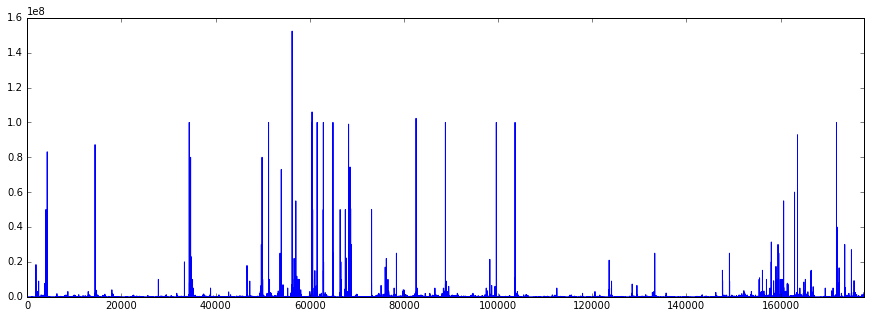

In [209]:
df.goal.describe()
df.goal.plot(figsize=(15,5))

# projects with goal of 1 million or more
print("goal over 1 mil: {:d}".format(len(df.goal[df.goal >= 1000000])))

### usd_pledged

- The amount of money raised in USD
- 157 projects managed to get more than 1 million in backing
- Most projects gained less than 6000 USD

count    1.777680e+05
mean     1.065866e+04
std      8.128235e+04
min      0.000000e+00
25%      6.852201e+01
50%      1.226000e+03
75%      5.550000e+03
max      1.026685e+07
Name: usd_pledged, dtype: float64

157

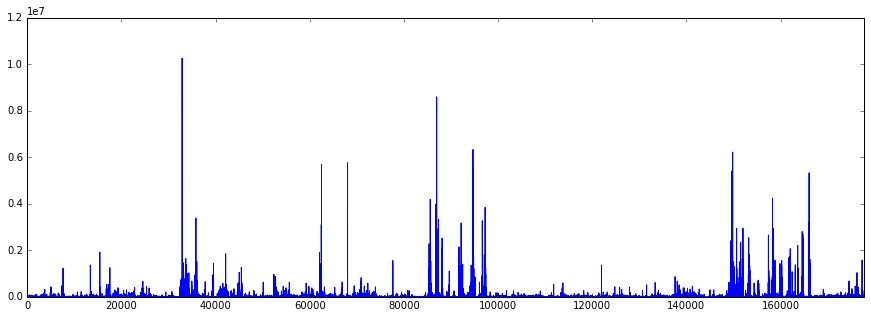

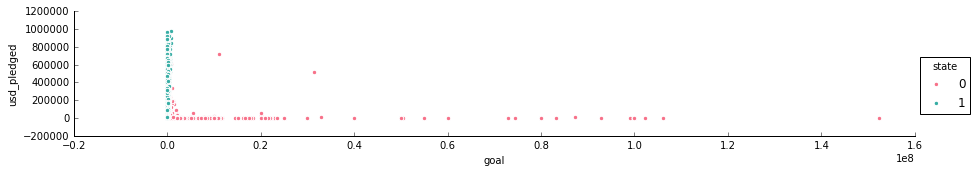

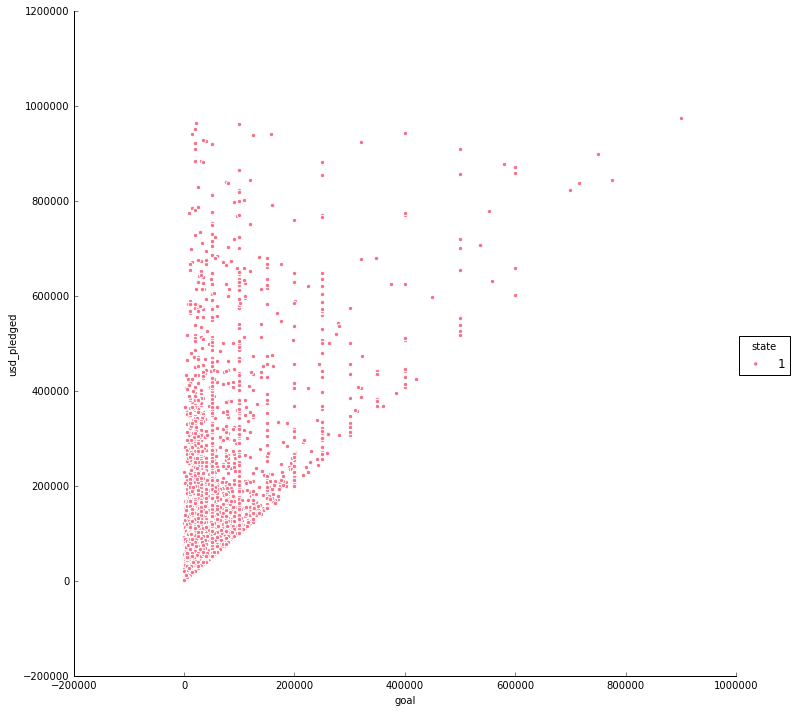

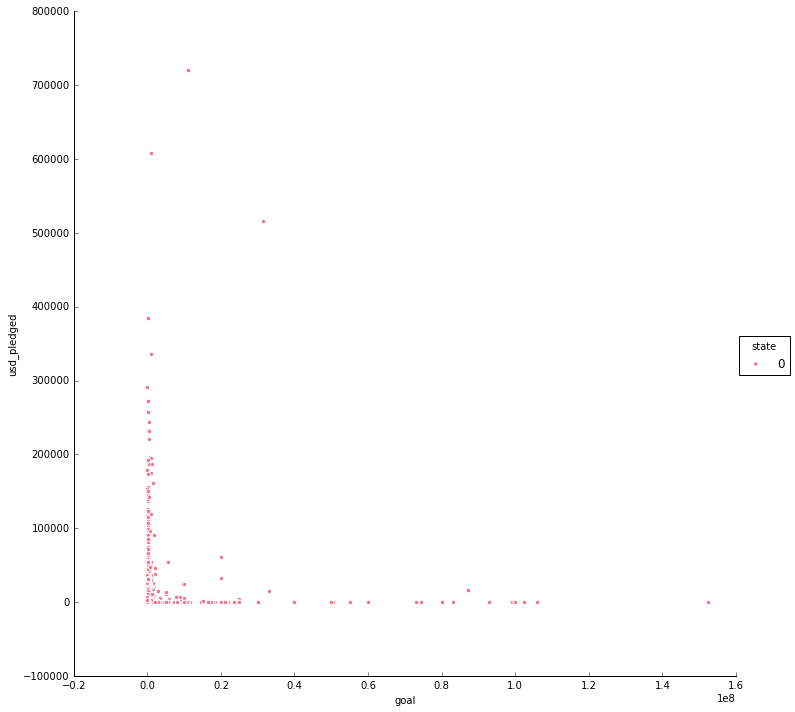

In [210]:
df.usd_pledged.describe()

df.usd_pledged.plot(figsize=(15,5))

len(df.usd_pledged[df.usd_pledged > 1000000])

# usd_pledged and goal, pledged under 1 mil
sns.pairplot(train_df[train_df.usd_pledged < 1000000], x_vars=['goal'], y_vars=['usd_pledged'], hue='state', palette='husl', aspect=5)
sns.pairplot(train_df[(train_df.state == 1) & (train_df.usd_pledged < 1000000)], x_vars=['goal'], y_vars=['usd_pledged'], hue='state', palette='husl', size=10)
sns.pairplot(train_df[(train_df.state == 0) & (train_df.usd_pledged < 1000000)], x_vars=['goal'], y_vars=['usd_pledged'], hue='state', palette='husl', size=10)

### blurb_length

- Blurb is a short description of the project, length 0 -- 35 words
- Most blurbs have 17 -- 23 words

TODO: standardize

count    177768.000000
mean         19.360430
std           4.845785
min           0.000000
25%          17.000000
50%          20.000000
75%          23.000000
max          35.000000
Name: blurb_length, dtype: float64

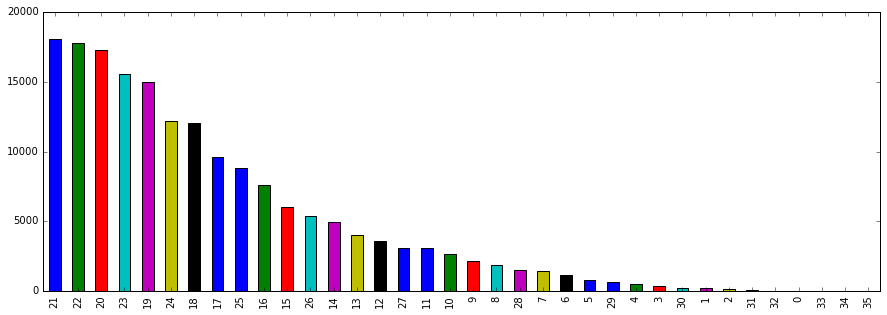

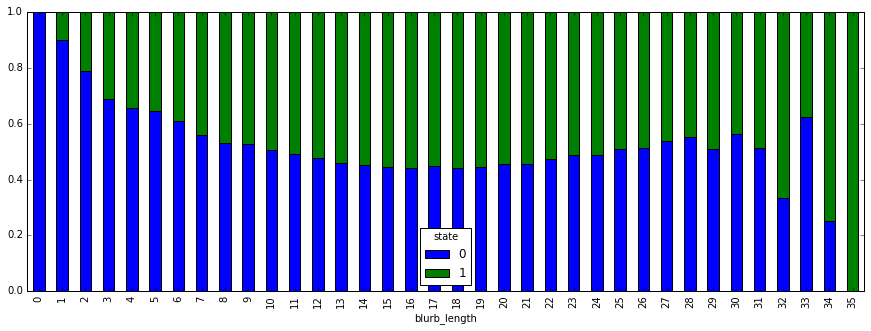

In [211]:
df.blurb_length.describe()

df.blurb_length.value_counts().plot.bar(figsize=(15,5))
pd.crosstab(train_df.blurb_length, train_df.state, normalize="index").plot.bar(figsize=(15,5),stacked=True)

### duration

- Length of the project in days
- Duration varies between 0 and 92 days
- Majority of projects have a duration of 1 month (28-31 days)

TODO: standardize

count    177768.000000
mean         33.611977
std          12.721739
min           1.000000
25%          30.000000
50%          30.000000
75%          36.000000
max          92.000000
Name: duration, dtype: float64

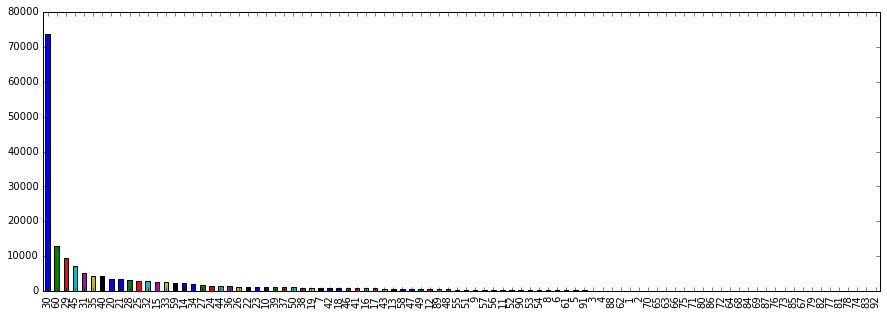

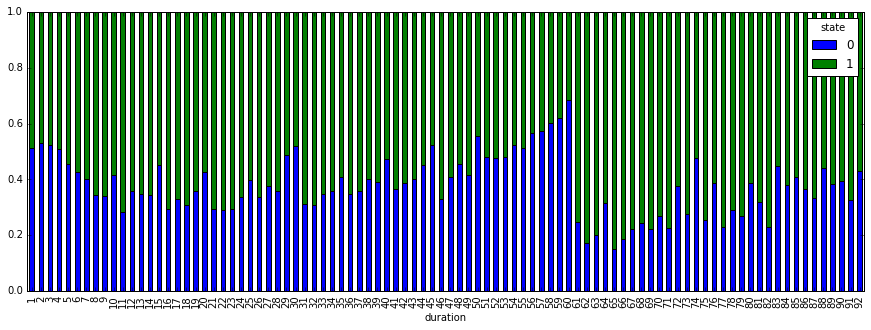

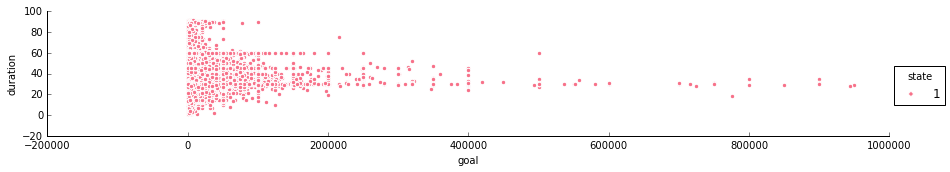

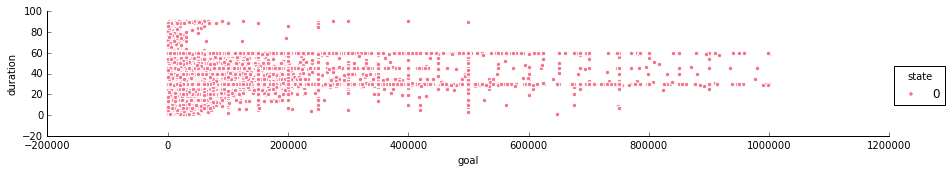

In [212]:
df.duration.describe()

df.duration.value_counts().plot.bar(figsize=(15,5))

pd.crosstab(train_df.duration, train_df.state, normalize="index").plot.bar(figsize=(15,5),stacked=True)

# goal vs. duration is successful and failed projects
sns.pairplot(df[(df.state == 1) & (df.goal < 1000000)], x_vars=['goal'], y_vars=['duration'], hue='state', palette='husl', aspect=5)
sns.pairplot(df[(df.state == 0) & (df.goal < 1000000)], x_vars=['goal'], y_vars=['duration'], hue='state', palette='husl', aspect=5)

### category

- Category of the project
- Dataset seems to only have a maximum of 2400 projects per category which might skew the data

TODO: Grouping categories needed/useful?

count        177768
unique          168
top       music/pop
freq           2400
Name: category, dtype: object

music/pop                      2400
film & video/shorts            2400
games/video games              2400
publishing/fiction             2400
design/product design          2400
publishing/children's books    2400
music/country & folk           2400
music/hip-hop                  2400
film & video/narrative film    2400
technology/software            2400
film & video/webseries         2400
technology/web                 2400
fashion/accessories            2400
food/restaurants               2400
technology/apps                2400
fashion/apparel                2400
games/tabletop games           2400
games/playing cards            2400
art/painting                   2400
art/illustration               2400
music/indie rock               2400
film & video/animation         2400
food/drinks                    2400
art/public art                 2400
comics/comic books             2400
music/classical music          2400
publishing/art books           2400
film & video/documentary    

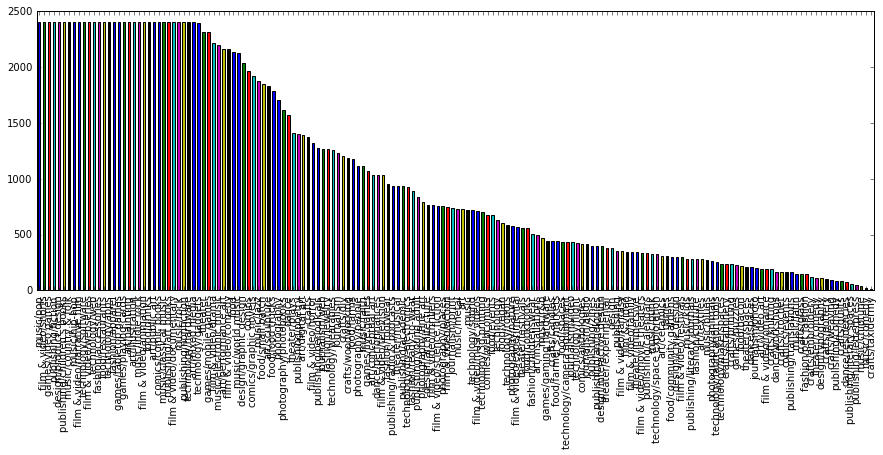

In [213]:
df.category.describe()

# number of unique values
df.category.value_counts()

# visualizing data
df.category.value_counts().plot.bar(figsize=(15,5))

# pd.crosstab(train_df.category, train_df.state, normalize="index").plot.bar(figsize=(15,5),stacked=True)

### country

- Country in which the project is taking place
- Clear majority are in the US

count     177768
unique        22
top           US
freq      139933
Name: country, dtype: object

US    139933
GB     15406
CA      6857
AU      3581
DE      1814
NL      1382
FR      1324
IT      1268
ES      1006
MX       876
SE       875
NZ       661
DK       575
IE       400
NO       360
CH       328
BE       311
HK       269
AT       248
SG       221
JP        46
LU        27
Name: country, dtype: int64

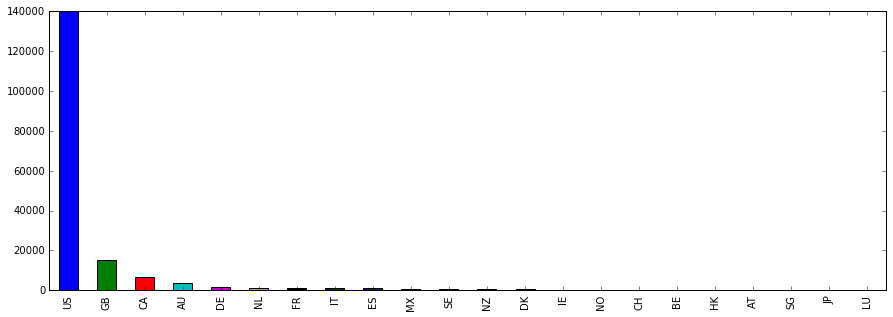

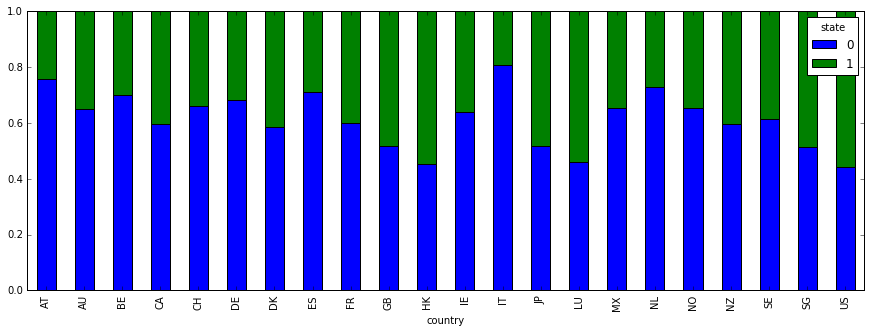

In [214]:
df.country.describe()
df.country.value_counts()

df.country.value_counts().plot.bar(figsize=(15,5))

pd.crosstab(train_df.country, train_df.state, normalize="index").plot.bar(figsize=(15,5),stacked=True)

### currency

- In which currency the project is trying to gain backing
- Seems to go hand in hand with the project's country)

count     177768
unique        14
top          USD
freq      139933
Name: currency, dtype: object

USD    139933
GBP     15406
EUR      7780
CAD      6857
AUD      3581
MXN       876
SEK       875
NZD       661
DKK       575
NOK       360
CHF       328
HKD       269
SGD       221
JPY        46
Name: currency, dtype: int64

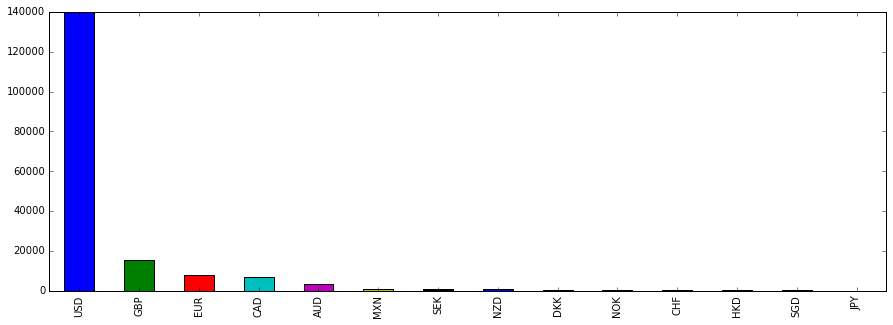

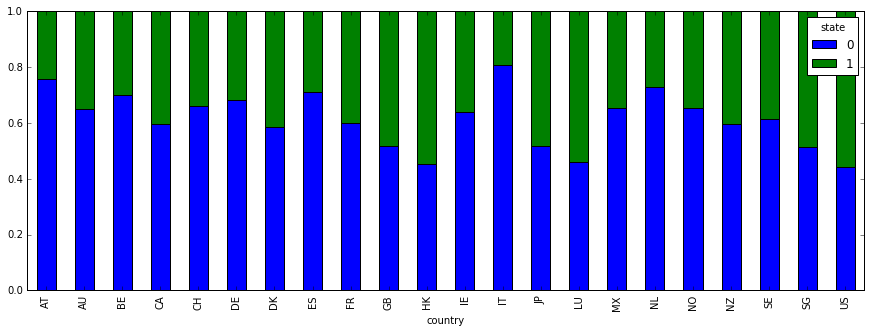

In [215]:
df.currency.describe()

df.currency.value_counts()

df.currency.value_counts().plot.bar(figsize=(15,5))

pd.crosstab(train_df.country, train_df.state, normalize="index").plot.bar(figsize=(15,5),stacked=True)

### disable_communication

- Are users able to communicate with project creator or not
- Only 601 projects have disabled communication

count     177768
unique         2
top        False
freq      177167
Name: disable_communication, dtype: object

601

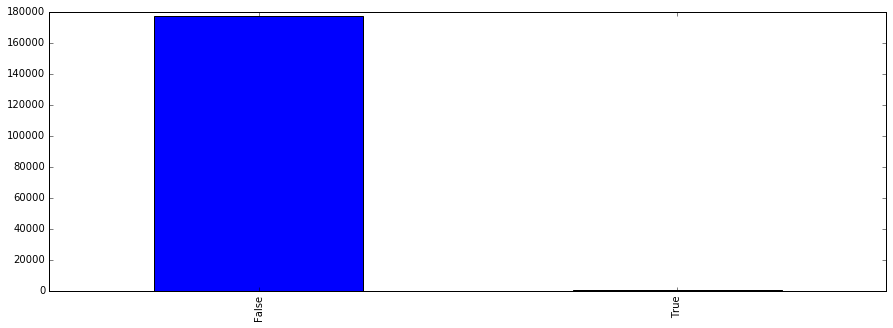

In [216]:
df.disable_communication.describe()

df.disable_communication.value_counts().plot.bar(figsize=(15,5))

len(df.disable_communication[df.disable_communication == True])

### is_starrable

- Are users able to star projects in order to follow them
- None of the completed projects have this value as `True`, so this is useless in predicting

count     177768
unique         2
top        False
freq      174065
Name: is_starrable, dtype: object

0

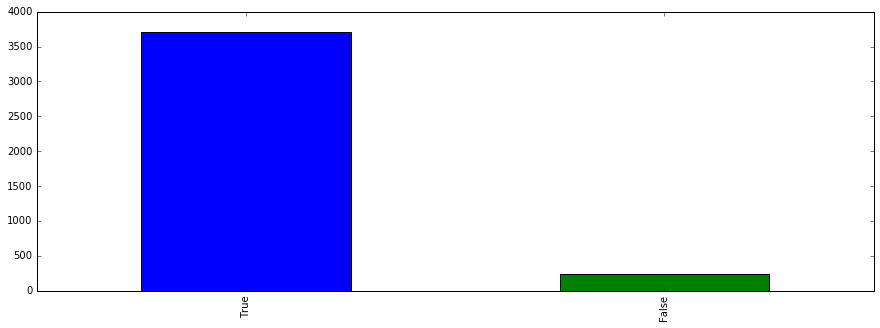

In [217]:
df.is_starrable.describe()

# live projects and is_starrable
test_df.is_starrable.value_counts().plot.bar(figsize=(15,5))

# number of starrable completed projects
len(train_df.is_starrable[train_df.is_starrable == True])


### staff_pick



count     177768
unique         2
top        False
freq      155323
Name: staff_pick, dtype: object

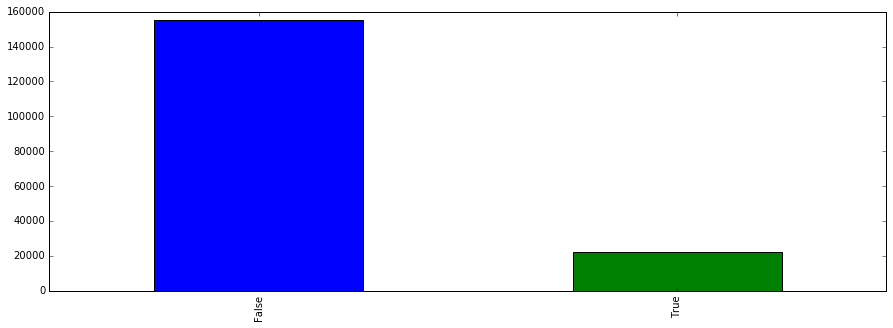

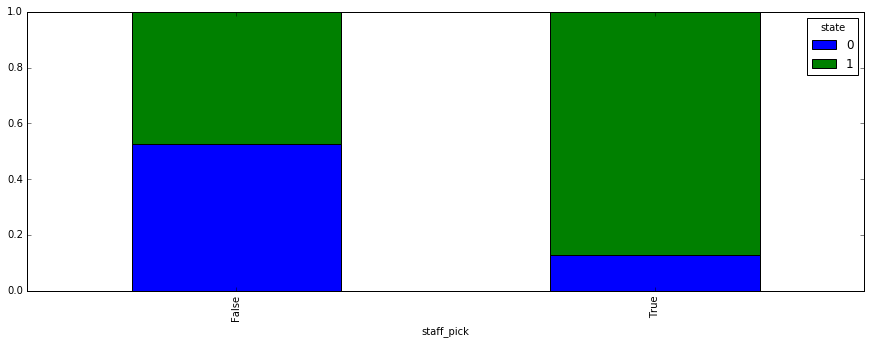

In [218]:
df.staff_pick.describe()

# visualize data
df.staff_pick.value_counts().plot.bar(figsize=(15,5))

# staff_pick and state
pd.crosstab(train_df.staff_pick, train_df.state, normalize="index").plot.bar(figsize=(15,5),stacked=True)

2003272.55

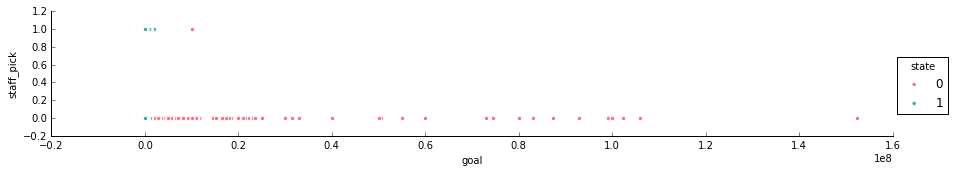

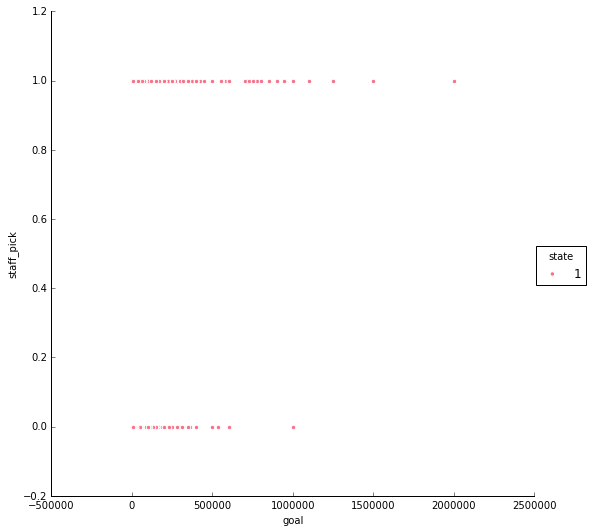

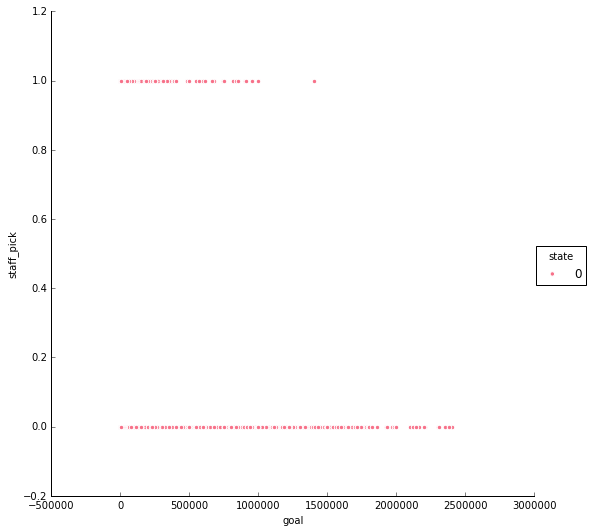

In [219]:
# staff_pick vs. goal

# what is the highest goal for a successful project that was a staff pick
max(train_df.goal[(train_df.staff_pick == 1) & (train_df.state == 1)])

sns.pairplot(train_df, y_vars=['staff_pick'], x_vars = ['goal'], hue='state', aspect=5, palette='husl')
sns.pairplot(train_df[(train_df.state == 1) & (train_df.goal < 2500000)], x_vars=['goal'], y_vars=['staff_pick'], hue='state', palette='husl', size=7.5)
sns.pairplot(train_df[(train_df.state == 0) & (train_df.goal < 2500000)], x_vars=['goal'], y_vars=['staff_pick'], hue='state', palette='husl', size=7.5)


### state

- If a project is Successful or if it's Cancelled/Failed/Suspended
- 1 if Successful, 0 otherwise, `live` for projects that are still ongoing 

In [220]:
df.state.describe()

df.state.value_counts()

count     177768
unique         3
top            1
freq       91355
Name: state, dtype: int64

1       91355
0       82468
live     3945
Name: state, dtype: int64

### urls

- json containing different urls for the projects such as project homepage
- Mostly used to recognize a project

### location

- More accurate location for the project within the country it takes place in

In [221]:
df.location.describe()

count              177768
unique              14399
top       Los Angeles, CA
freq                 9024
Name: location, dtype: object

In [222]:
## 